<a href="https://colab.research.google.com/github/tithi-123/Brain-Tumour-/blob/main/braintumer_svm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q pydicom

In [ ]:
import matplotlib.pyplot as plt
import os
import pydicom
import numpy as np 
import skimage.io
import skimage.feature
from scipy import ndimage, misc 
from sklearn.cluster import KMeans

from pathlib import Path
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd

from skimage.filters import roberts,sobel,scharr,prewitt



In [ ]:
from scipy import ndimage as nd
from skimage.feature import local_binary_pattern
from skimage.filters import gabor

In [ ]:
def preprocessing(original_image):
  img_2d = original_image.astype(float)
  img_2d_scaled = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
  img_2d_scaled = np.uint8(img_2d_scaled)
  #filters
  result = ndimage.median_filter(img_2d_scaled, size=3)


  gaussian_img=nd.gaussian_filter(result,sigma=3)

  gaussian_img7=nd.gaussian_filter(result,sigma=7)



  kmeans = KMeans(n_clusters=100, random_state=0).fit(gaussian_img7)
  pic1 = kmeans.cluster_centers_[kmeans.labels_]

  ans=pic1
  ans=ans.astype(int)
  #ans=gaussian_img7
  #ans=ans.astype(int)
  #glcm feature extraction
  g = skimage.feature.greycomatrix(ans, [1], [0], levels=256, symmetric=True, normed=True)
  contrast=skimage.feature.greycoprops(g, 'contrast')[0][0]
  energy=skimage.feature.greycoprops(g, 'energy')[0][0]
  homogeneity=skimage.feature.greycoprops(g, 'homogeneity')[0][0]
  correlation=skimage.feature.greycoprops(g, 'correlation')[0][0]
  dissimilarity=skimage.feature.greycoprops(g, 'dissimilarity')[0][0]
  ASM=skimage.feature.greycoprops(g, 'ASM')[0][0]


  #finding LBP
  feat_lbp=local_binary_pattern(pic1,8,1,'uniform')
  feat_lbp=np.uint8((feat_lbp/feat_lbp.max())*255)

  lbp_hist,_=np.histogram(feat_lbp,8)
  lbp_hist=np.array(lbp_hist,dtype=float)
  lbp_prob=np.divide(lbp_hist,np.sum(lbp_hist))
  lbp_energy=np.sum(lbp_prob**2)
  lbp_entropy=-np.sum(np.multiply(lbp_prob,np.log2(lbp_prob)))


  #gabor filter
  gaborFilt_real,gaborFilt_imag=gabor(img_2d_scaled,frequency=0.6)
  gaborFilt = (gaborFilt_real**2+gaborFilt_imag**2)//2

  gabor_hist,_=np.histogram(gaborFilt,8)
  gabor_hist=np.array(gabor_hist,dtype=float)
  gabor_prob=np.divide(gabor_hist,np.sum(gabor_hist))
  gabor_energy=np.sum(gabor_prob**2)
  gabor_entropy=-np.sum(np.multiply(gabor_prob,np.log2(gabor_prob)))



  #features list
  feature_inner=[contrast,energy,homogeneity,correlation,dissimilarity,ASM,lbp_energy,lbp_entropy,gabor_energy,gabor_entropy,label]
  #print(feature_inner)
  features_list.append(feature_inner)

  


In [ ]:
features_list=[]
for path in Path('/content/drive/My Drive/1512427/brainTumorDataPublic_1-766').rglob('*.mat'):
 p=h5py.File('/content/drive/My Drive/1512427/brainTumorDataPublic_1-766/'+path.name,'r')
 for i in p.keys():
  image=np.array(p[i]['image'])
  original_image=image
  label1=np.array(p[i]['label'])
  label=label1.tolist()[0][0]
  preprocessing(original_image)
  

  
  
  

  
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

file2

In [ ]:
for path in Path('/content/drive/My Drive/1512427/brainTumorDataPublic_1533-2298').rglob('*.mat'):
 p=h5py.File('/content/drive/My Drive/1512427/brainTumorDataPublic_1533-2298/'+path.name,'r')
 for i in p.keys():
  image=np.array(p[i]['image'])
  original_image=image
  label1=np.array(p[i]['label'])
  label=label1.tolist()[0][0]
  preprocessing(original_image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

file 3

In [ ]:
for path in Path('/content/drive/My Drive/1512427/brainTumorDataPublic_2299-3064').rglob('*.mat'):
 p=h5py.File('/content/drive/My Drive/1512427/brainTumorDataPublic_2299-3064/'+path.name,'r')
 for i in p.keys():
  image=np.array(p[i]['image'])
  original_image=image
  label1=np.array(p[i]['label'])
  label=label1.tolist()[0][0]
  preprocessing(original_image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

file 4

In [ ]:
for path in Path('/content/drive/My Drive/1512427/brainTumorDataPublic_767-1532').rglob('*.mat'):
 p=h5py.File('/content/drive/My Drive/1512427/brainTumorDataPublic_767-1532/'+path.name,'r')
 for i in p.keys():
  image=np.array(p[i]['image'])
  original_image=image
  label1=np.array(p[i]['label'])
  label=label1.tolist()[0][0]
  preprocessing(original_image)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [ ]:
feature_df=pd.DataFrame(features_list,columns=['contrast','energy','homogeneity','correlation','dissimilarity','ASM','lbp_energy','lbp_entropy','gabor_energy','gabor_entropy','label'])
feature_df1=feature_df.fillna(0)
print(feature_df.fillna(0))


      contrast    energy  homogeneity  ...  gabor_energy  gabor_entropy  label
0     1.579646  0.229679     0.778785  ...      0.702283       0.954780    1.0
1     1.061380  0.259243     0.803405  ...      0.827377       0.581646    1.0
2     1.207207  0.223041     0.788068  ...      0.782882       0.722463    1.0
3     1.450033  0.321876     0.805935  ...      0.749144       0.848199    1.0
4     1.467737  0.216545     0.774829  ...      0.732454       0.842323    1.0
...        ...       ...          ...  ...           ...            ...    ...
3059  1.112546  0.089346     0.719721  ...      0.682484       0.984974    3.0
3060  1.357407  0.159162     0.772012  ...      0.739621       0.847404    3.0
3061  1.167392  0.096328     0.722155  ...      0.641435       1.081232    3.0
3062  2.065196  0.076201     0.664179  ...      0.546202       1.354934    3.0
3063  1.042827  0.124609     0.755635  ...      0.678639       0.993373    3.0

[3064 rows x 11 columns]


In [ ]:

Y=feature_df1['label'].values

X=feature_df1.drop(labels = ['label'], axis=1)

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=20)

from sklearn.svm import LinearSVC

model=LinearSVC(max_iter=1000)

model.fit(X_train,Y_train)
prediction_test=model.predict(X_test)
from sklearn import metrics
print("accuracy = ",metrics.accuracy_score(Y_test,prediction_test))

accuracy =  0.6696574225122349


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
print(accuracy_score(Y_test,prediction_test))
print(precision_score(Y_test,prediction_test,average=None))
print(recall_score(Y_test,prediction_test,average=None))
print(f1_score(Y_test,prediction_test,average=None))
print(confusion_matrix(Y_test,prediction_test))

save features_list to drive

In [ ]:
import numpy as np

np.save("/content/drive/My Drive/feature_file_cnn",features_list)

In [ ]:
import pickle 
with open("/content/drive/My Drive/X_train_file_cnn.pickl","wb")  as f:
  pickle.dump(X_train,f)

with open("/content/drive/My Drive/X_test_file_cnn.pickl","wb")  as f:
  pickle.dump(X_test,f)
  

In [ ]:
Y_train_pd=pd.DataFrame(Y_train)
Y_test_pd=pd.DataFrame(Y_test)

with open("/content/drive/My Drive/Y_train_file_cnn.pickl","wb")  as f:
  pickle.dump(Y_train_pd,f)

with open("/content/drive/My Drive/Y_trst_file_cnn.pickl","wb")  as f:
  pickle.dump(Y_test_pd,f)


In [ ]:
saved_model_svm = pickle.dumps("/content/drive/My Drive/model") 

In [ ]:
np.save("/content/drive/My Drive/X_train_save_cnn",X_train)
np.save("/content/drive/My Drive/Y_train_save_cnn",Y_train)
np.save("/content/drive/My Drive/X_test_save_cnn",X_test)
np.save("/content/drive/My Drive/Y_test_save_cnn",Y_test)

In [ ]:
import numpy as np

ff=np.load("/content/drive/My Drive/X_train_save1.npy")

In [ ]:
import pickle 
with open("/content/drive/My Drive/X_train_file.pickl","rb")  as f:
  aa=pickle.load(f)

dicom to greylevel

median filter

k means clustering

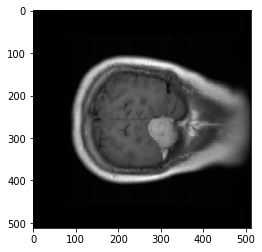

In [ ]:
from matplotlib import pyplot as plt
im=plt.imshow(pic1,cmap='gray')

In [ ]:
ans=pic1
ans=ans.astype(int)
print(type(pic1))
print(type(ans))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


glcm feature extraction

In [ ]:
import skimage.io
import skimage.feature

g = skimage.feature.greycomatrix(ans, [1], [0], levels=256, symmetric=True, normed=True)
contrast=skimage.feature.greycoprops(g, 'contrast')[0][0]
energy=skimage.feature.greycoprops(g, 'energy')[0][0]
homogeneity=skimage.feature.greycoprops(g, 'homogeneity')[0][0]
correlation=skimage.feature.greycoprops(g, 'correlation')[0][0]

dissimilarity=skimage.feature.greycoprops(g, 'dissimilarity')[0][0]
ASM=skimage.feature.greycoprops(g, 'ASM')[0][0]

print(contrast)
print(energy)
print(homogeneity)
print(correlation)
print(dissimilarity)
print(ASM)


10.455701137475538
0.2846146617749928
0.721544508430031
0.9980152712741909
1.3328262597847358
0.08100550569729355


In [ ]:
plt.imshow(image4, cmap='gray', vmin=0, vmax=255)
plt.show()
print(np.amax(image4))

'''
import skimage.io
import skimage.feature
#print(np.amax(image))
import pandas as pd
im=pd.DataFrame(image)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(im)
'''



In [ ]:
import pandas as pd
l=[[1,2,3],[4,5,6],[7,8,9]]
k=pd.DataFrame(l)
print(k)

print(l)
print(type(k))
print(type(l))

   0  1  2
0  1  2  3
1  4  5  6
2  7  8  9
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
<class 'pandas.core.frame.DataFrame'>
<class 'list'>
